# CGEM the Notebook

This Notebook gives an overview of looking at CGEM output with Python.

## Compile the code

In [1]:
!make

gfortran -c    moc_src/singledouble.F90
gfortran -c    moc_src/sw_adtg.F90
gfortran -c    moc_src/sw_ptmp.F90
gfortran -c    moc_src/sw_temp.F90
gfortran -c    moc_src/p80.F90
gfortran -c    moc_src/constants.F90
gfortran -c    moc_src/phsolvers.F90
gfortran -c    moc_src/varsolver.F90
gfortran -c    moc_src/depth2press.F90
gfortran -c    moc_src/rho.F90
gfortran -c    moc_src/rhoinsitu.F90
gfortran -c    moc_src/vars.F90
gfortran -c    moc_src/p2fCO2.F90
gfortran -c    moc_src/gasx.F90
gfortran -c     cgem_src/date_time.F90
gfortran -c     cgem_src/calc_solar_zenith.F90
gfortran -c     cgem_src/grid.F90
gfortran -c     cgem_src/cgem.F90
gfortran -c     cgem_src/cgem_growth.F90
gfortran -c     cgem_src/cgem_misc.F90
gfortran -c     cgem_src/cgem_utils.F90
gfortran -c     cgem_src/cgem_light.F90
gfortran -c     cgem_src/DailyRad_init.F90
gfortran -c     cgem_src/cgem_step.F90
gfortran -c     cgem_src/main.F90
gfortran -o CGEM.exe   singledouble.o sw_adtg.o sw_ptmp.o sw_temp.o p80.o cons

## Import CGEM Python functions
Current library of functions are in **cgem.py**, absolutely devoid of commenting and error checking.  (Sorry, try back later.)

Click the folder icon on the left to see the files.

In [6]:
#Imports all the Python functions from cgem.nml and keep the original names
from cgem import *

## Working with namelists

CGEM reads the input parameters from namelists:
- **grid.nml**: parameters that should come from the hydro code
- **cgem.nml**: parameters that should (mostly) be private to the biogeochem code

Use **f90nml** to read and manipulate namelists.  See:
- https://f90nml.readthedocs.io/en/latest/index.html

In [9]:
#Import f90nml
import f90nml

### The grid parameters:

In [11]:
#Read and print grid parameters
grid = f90nml.read('grid.nml')
print("Grid parameters")
print(grid)


Grid parameters
&hydro
    nea = 1
    km = 5
    iyrs = 2006
    imons = 1
    idays = 1
    ihrs = 18
    imins = 0
    isecs = 0
    iyre = 2006
    imone = 6
    idaye = 1
    ihre = 18
    imine = 0
    isece = 0
    dt = 3600
    dt_out = 3600
    lon_in = -92.39
    lat_in = 29.03
    depth_in = 20.0
    sal_init = 30.0
    temp_init = 16.0
/


### The CGEM parameters

In [13]:
#Read and print cgem parameters
cgem = f90nml.read('cgem.nml')
print("CGEM parameters")
print(cgem)

CGEM parameters
&nosp
    nospa = 6
    nospz = 2
/

&switches
    which_fluxes = 0, 0, 0, 0, 0, 0, 0, 0
    which_temperature = 1
    which_uptake = 1
    which_quota = 1
    which_irradiance = 1
    which_chlac = 1
    which_photosynthesis = 1
    which_growth = 1
/

&optics
    kw = 0.146
    kcdom = 0.001
    kspm = 0.029
    kchla = 0.024
    astar490 = 0.0375
    aw490 = 0.015
    astaroma = 0.01
    astaromz = 0.01
    astaromr = 0.01
    astarombc = 0.01
    parfac = 1.0
    sinkcdom = 0.0
/

&temperature
    tref = 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 22.0, 26.0
    ktg1 = 0.0035, 0.0035, 0.0035, 0.0035, 0.0035, 0.0035, 0.0035, 0.0035
    ktg2 = 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001
    ea = 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61
/

&phytoplankton
    umax = 1.12, 1.12, 1.12, 1.12, 1.12, 1.12
    cchla = 181.477, 181.477, 181.477, 181.477, 181.477, 181.477
    alpha = 3.96e-16, 3.96e-16, 3.96e-16, 3.96e-16, 3.96e-16, 3.96e-16
    beta = 1.1e-18, 1.1e-18

## Modifying the namelists
You can directly edit the **.nml** files by clicking on them, editing, and saving, but it is actually more reliable to do this in Python. The Fortran code won't notice if you don't define the correct number of parameters and will crash with a segmentation fault if you do that wrong.

Some notes:
- Fortran isn't case sensitive, but Python is.  Use all lower case when using f90nml.
- Using `force=True` with nml.write will overwrite the nml file.  The CGEM code needs those files to be named **grid.nml** and **cgem.nml**.
- If you mess something up and want to start with the default **cgem** or **grid.nml**, do `!cp nml_save/cgem.nml .` and `!cp nml_save/grid.nml .`  
- You can check the difference between current and default nmls by doing `!diff grid.nml nml_save/grid.nml`.  
- In Python, you can do `![whatever the regular shell command is]`.

## Try a plot

syntax:
cgem_plot1D(grid,var)

Options for var are:

A, Qn, Qp, Z, NO3, NH4, PO4, DIC, O2, OM1_A, OM2_A, OM1_Z, OM2_Z, OM1_R, OM2_R, CDOM, Si, Alk, Tr

Plotting CGEM variable NH4


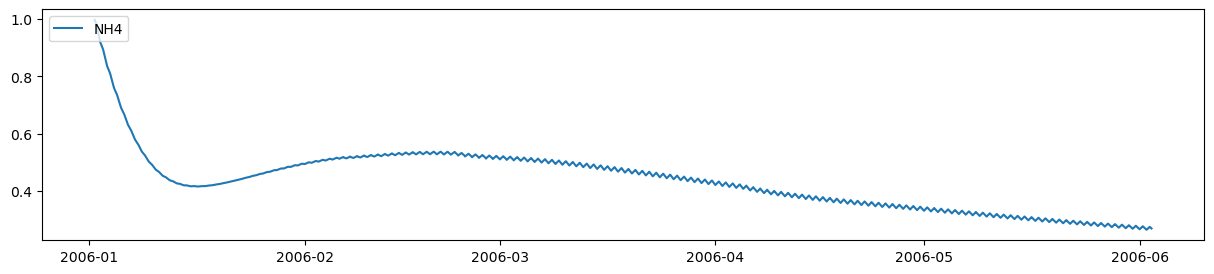

In [4]:
cgem_plot1D(grid,"NH4")

## Hydro grid/time/inits are in 'grid', CGEM vars/switches are in 'cgem'.
You can get an element with 'get'.

In [5]:
grid.get('hydro').get('iyrs')

2006

## CGEM Python functions available are:
- cgem_plot1D(grid,var) - makes a 1D plot of a state variable 'var'
- cgem_getvar(var) - gets a state variable 'var'
- cgem_timearray(var, grid) - creates a time array starting with start of simulation until the variable stops (in case it crashes, it uses length of variable)
- cgem_tstart(grid) - gets datetime object for start of simulation
- cgem_tend(grid) - ditto end of simulation

## To work with the output, save to a variable

In [6]:
A = cgem_getvar("A")
A

Calculating CGEM variable A


array([6.13639280e+07, 6.27587960e+07, 6.41853040e+07, ...,
       1.79922688e+08, 1.81228944e+08, 1.82542800e+08])

## Then you can calculate stuff or make your own plots

The maximum phytoplankton is:  198679392.0


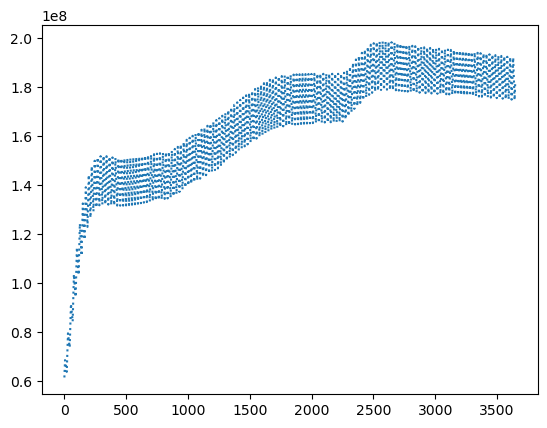

In [7]:
plt.plot(A,linestyle='dotted')
plt.show
print("The maximum phytoplankton is: ",max(A))

## When making your own plots, calculate the Time array
...so the x axis makes sense, otherwise, it shows the number of steps

In [8]:
T = cgem_timearray(A,grid)

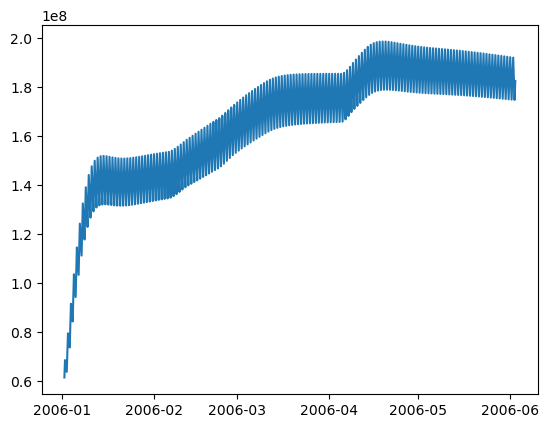

In [9]:
plt.plot(T,A)

## That's all we got for now.
To plot a bunch of variables on the same plot, or change colors and stuff, you write your own Python...

In [10]:
Z = cgem_getvar('Z')
NO3 = cgem_getvar('NO3')
NH4 = cgem_getvar('NH4')
PO4 = cgem_getvar('PO4')

Calculating CGEM variable Z
Calculating CGEM variable NO3
Calculating CGEM variable NH4
Calculating CGEM variable PO4


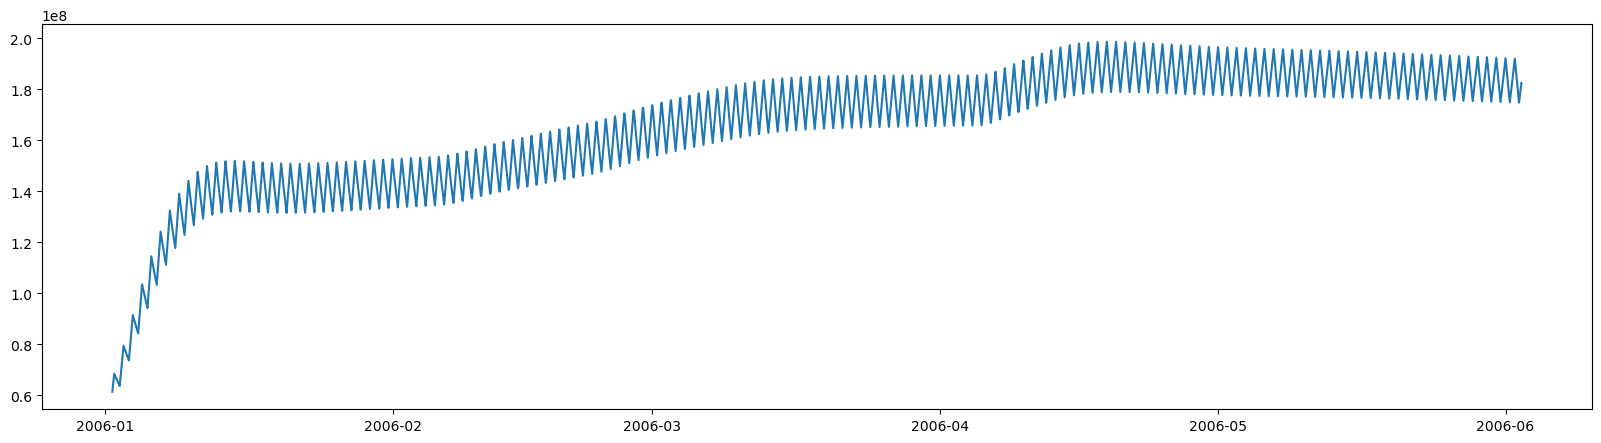

In [11]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,A)

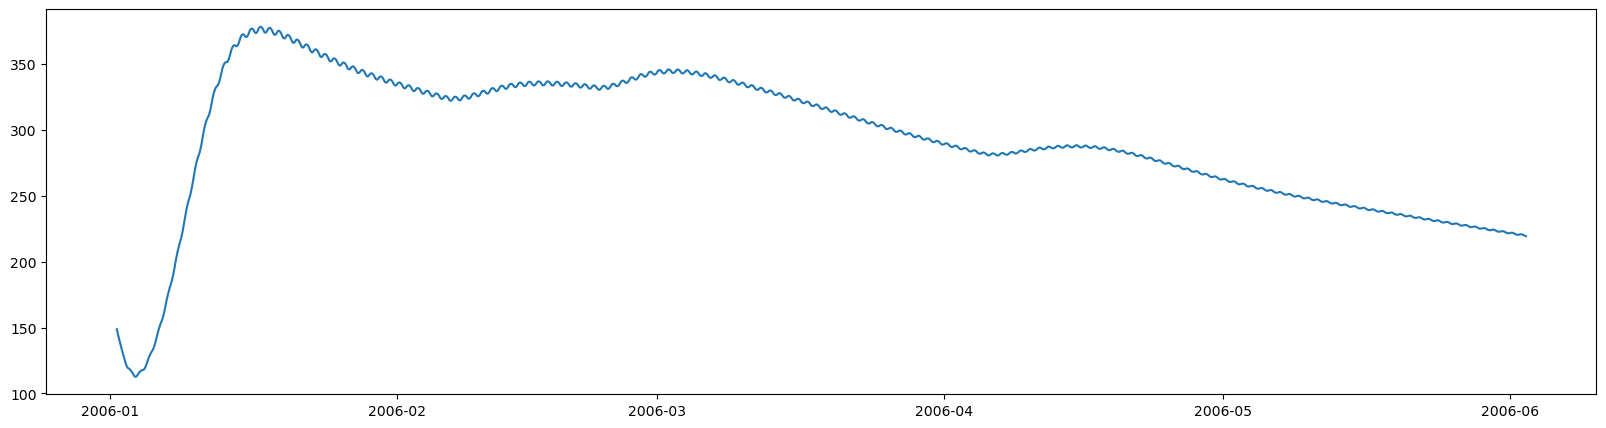

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,Z)

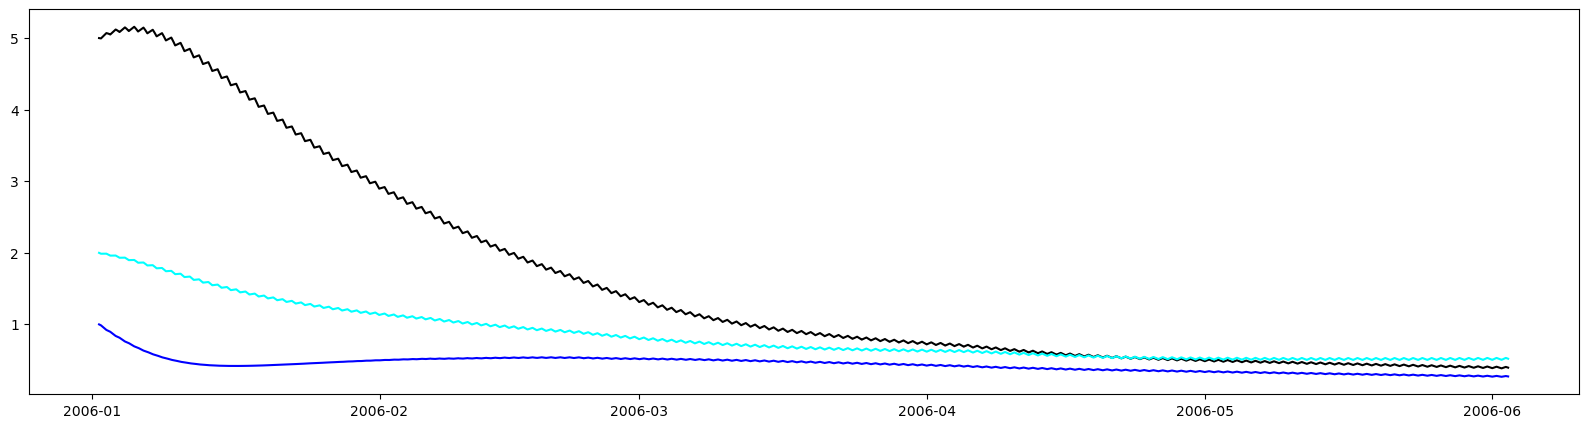

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,NO3, color='black')
ax.plot(T,NH4, color='blue')
ax.plot(T,PO4, color='cyan')